# Komiwojazer

## Implementation

In [44]:
# random n cities
def random_cities(n: int, seed: int, square_size: int = 300) -> list[tuple[int, int]]:
    """
    Generate n unique random cities with coordinates in the range [0, 300).
    :param n: Number of cities to generate.
    :return: List of tuples representing unique city coordinates.
    """
    import random
    random.seed(seed)  # For reproducibility

    if n > square_size * square_size:
        raise ValueError("Cannot generate more than 90,000 unique coordinates in the given range.")

    coordinates = set()
    while len(coordinates) < n:
        x = random.randint(0, square_size-1)
        y = random.randint(0, square_size-1)
        coordinates.add((x, y))
    
    return list(coordinates)


# Example usage
for i in range(10,50, 10):
    print(f"random_cities({i}) = {random_cities(i, 1)}")

random_cities(10) = [(194, 107), (221, 1), (32, 130), (48, 249), (228, 136), (117, 52), (230, 241), (14, 199), (68, 291), (60, 253)]
random_cities(20) = [(221, 1), (270, 113), (195, 110), (283, 119), (14, 199), (224, 253), (176, 118), (162, 15), (48, 249), (230, 241), (68, 291), (60, 253), (194, 107), (277, 4), (32, 130), (228, 136), (117, 52), (11, 13), (112, 235), (216, 14)]
random_cities(30) = [(221, 1), (270, 113), (195, 110), (283, 119), (14, 199), (224, 253), (151, 61), (176, 118), (162, 15), (145, 255), (48, 249), (51, 95), (230, 241), (68, 291), (60, 253), (194, 107), (277, 4), (32, 130), (228, 136), (117, 52), (11, 13), (258, 201), (170, 256), (216, 259), (17, 245), (112, 235), (97, 155), (148, 11), (213, 284), (216, 14)]
random_cities(40) = [(221, 1), (270, 113), (187, 280), (195, 110), (283, 119), (14, 199), (224, 253), (151, 61), (176, 118), (162, 15), (22, 157), (15, 240), (145, 255), (48, 249), (51, 95), (230, 241), (68, 291), (55, 83), (60, 253), (194, 107), (277, 4), (3

In [8]:
# random_population
def set_random_population(m: int, n: int) -> list[list[int]]:
    """
    Generate a random population matrix of size m x n with m chromosoms and n gens of evry chromosom (cont of cities to visit).
    :param m: Number of rows (count of chromosoms).
    :param n: Number of columns (cities).
    :return: Random population matrix.
    """
    import random

    population = []
    for i in range(m):
        cities = list(range(n))
        random.shuffle(cities)
        population.append(cities)
    return population

# Example usage
for i in range(10,50, 10):
    print(f"set_random_population({i}, {i}) = {set_random_population(i, i)}")

set_random_population(10, 10) = [[7, 0, 4, 8, 5, 9, 2, 6, 3, 1], [3, 9, 1, 4, 0, 5, 2, 7, 6, 8], [5, 3, 7, 8, 6, 9, 0, 2, 4, 1], [2, 3, 0, 7, 9, 5, 6, 4, 8, 1], [7, 6, 2, 9, 3, 1, 5, 4, 0, 8], [4, 0, 6, 2, 9, 7, 3, 1, 8, 5], [6, 8, 9, 1, 2, 5, 4, 3, 7, 0], [2, 5, 4, 0, 6, 7, 9, 1, 3, 8], [3, 8, 1, 9, 6, 2, 7, 4, 5, 0], [0, 2, 5, 1, 4, 8, 6, 3, 7, 9]]
set_random_population(20, 20) = [[9, 18, 5, 11, 6, 0, 12, 13, 19, 14, 10, 1, 7, 17, 2, 3, 15, 4, 16, 8], [17, 9, 7, 3, 14, 1, 10, 18, 4, 19, 11, 6, 16, 5, 15, 0, 13, 12, 2, 8], [18, 4, 19, 6, 9, 13, 8, 14, 7, 16, 12, 1, 15, 17, 3, 5, 2, 10, 0, 11], [9, 12, 16, 15, 7, 3, 18, 0, 2, 10, 5, 14, 11, 8, 17, 6, 1, 13, 19, 4], [11, 17, 9, 16, 2, 8, 1, 4, 18, 14, 15, 6, 19, 12, 0, 10, 13, 7, 5, 3], [6, 1, 5, 13, 19, 3, 9, 17, 14, 15, 16, 7, 18, 0, 11, 12, 8, 10, 4, 2], [18, 12, 14, 10, 19, 16, 8, 2, 0, 3, 11, 17, 4, 7, 13, 5, 1, 6, 15, 9], [8, 17, 3, 4, 19, 0, 10, 1, 2, 7, 12, 6, 14, 11, 5, 18, 16, 13, 15, 9], [4, 13, 6, 18, 5, 11, 3, 12, 19, 2, 10

In [9]:
# evaluation function
def evaluate_population(population: list[list[int]], cities: list[tuple[int, int]]) -> list[float]:
    """
    Evaluate the fitness of each chromosome in the population based on the total distance traveled.
    :param population: List of chromosomes (each chromosome is a list of city indices).
    :param cities: List of city coordinates.
    :return: List of fitness values for each chromosome.
    """
    from math import sqrt

    def distance(city1: tuple[int, int], city2: tuple[int, int]) -> float:
        return sqrt((city1[0] - city2[0]) ** 2 + (city1[1] - city2[1]) ** 2)

    fitness = []
    for chromosome in population:
        total_distance = 0
        for i in range(len(chromosome)):
            city1 = cities[chromosome[i]]
            city2 = cities[chromosome[(i + 1) % len(chromosome)]]
            total_distance += distance(city1, city2)
        fitness.append(total_distance)
    
    return fitness

# Example usage
cities = random_cities(10)
population = set_random_population(5, 10)
fitness = evaluate_population(population, cities)
print(f"Cities: {cities}")
print(f"Population: {population}")
print(f"Fitness: {fitness}")

Cities: [(25, 279), (192, 193), (120, 109), (255, 298), (47, 186), (218, 247), (282, 295), (92, 188), (208, 156), (121, 21)]
Population: [[1, 2, 0, 3, 9, 6, 5, 7, 8, 4], [6, 8, 0, 9, 5, 1, 3, 4, 7, 2], [4, 6, 9, 7, 5, 0, 3, 8, 1, 2], [1, 3, 9, 6, 4, 8, 5, 7, 2, 0], [3, 7, 8, 1, 6, 0, 5, 2, 9, 4]]
Fitness: [1810.0732896292423, 1693.3219959015257, 1718.5211333755512, 1867.8579112275852, 1620.7845842843458]


In [20]:
# population selection
def select_new_population(population: list[list[int]], fitness: list[float], selection_method: str, n: int = 0) -> list[list[int]]:
    """
    Select a new population based on the fitness of the current population.
    :param population: List of chromosomes (each chromosome is a list of city indices).
    :param fitness: List of fitness values for each chromosome.
    :param selection_method: Method for selecting the new population ('roulette' or 'rank').
    :param n: Number of chromosomes to select for the new population. if n=0, select population by rulet method.
    :return: New population selected based on fitness.
    """
    if n == 0:
        n = len(population) // 2

    if selection_method == 'rank':
        sorted_population = [x for _, x in sorted(zip(fitness, population))]
        return sorted_population[:n]
    elif selection_method == 'roulette':
        import random

        inv_fitness = [1 / f for f in fitness]
        total = sum(inv_fitness)
        probabilities = [f / total for f in inv_fitness]
        selected_population = random.choices(population, weights=probabilities, k=n)
        return selected_population
    else:
        raise ValueError("Invalid selection method. Use 'roulette' or 'rank'.")
    

# Example usage
cities = random_cities(10)
population = set_random_population(5, 10)
fitness = evaluate_population(population, cities)
selected_population = select_new_population(population, fitness, 'rank', 3)
fitness_for_selected = evaluate_population(selected_population, cities)
fitness_sorted = sorted(fitness)
print(f"All Fitness: {fitness_sorted}")
print(f"Selected Population (Rank): {selected_population}, Fitness: {fitness_for_selected}")
selected_population = select_new_population(population, fitness, 'roulette', 3)
fitness_for_selected = evaluate_population(selected_population, cities)
print(f"Selected Population (Roulette): {selected_population}, Fitness: {fitness_for_selected}")

All Fitness: [1402.3343261388616, 1519.9212723751693, 1576.4195540394753, 1695.8333893759846, 1717.684408744223]
Selected Population (Rank): [[8, 2, 9, 3, 7, 4, 6, 1, 5, 0], [3, 8, 5, 4, 2, 1, 7, 6, 9, 0], [5, 1, 2, 4, 6, 0, 7, 9, 3, 8]], Fitness: [1402.3343261388616, 1519.9212723751693, 1576.4195540394753]
Selected Population (Roulette): [[8, 2, 9, 3, 7, 4, 6, 1, 5, 0], [8, 2, 9, 3, 7, 4, 6, 1, 5, 0], [3, 8, 5, 4, 2, 1, 7, 6, 9, 0]], Fitness: [1402.3343261388616, 1402.3343261388616, 1519.9212723751693]


In [21]:
# crossover
def crossover(parent1: list[int], parent2: list[int]) -> tuple[list[int], list[int]]:
    """
    Perform crossover between two parent chromosomes to create two offspring.
    :param parent1: First parent chromosome.
    :param parent2: Second parent chromosome.
    :return: Two offspring chromosomes.
    """
    import random

    size = len(parent1)
    crossover_point = random.randint(0, size - 1)

    child1 = parent1[:crossover_point] + [city for city in parent2 if city not in parent1[:crossover_point]]
    child2 = parent2[:crossover_point] + [city for city in parent1 if city not in parent2[:crossover_point]]

    return child1, child2

# mutation
def mutate(chromosome: list[int]) -> list[int]:
    """
    Mutate a chromosome by swapping two cities with a given mutation rate.
    :param chromosome: Chromosome to mutate.
    :param mutation_rate: Probability of mutation for each city.
    :return: Mutated chromosome.
    """
    import random

    first_gen = random.randint(0, len(chromosome) - 1)
    second_gen = random.randint(0, len(chromosome) - 1)
    while first_gen == second_gen:
        second_gen = random.randint(0, len(chromosome) - 1)
    
    chromosome[first_gen], chromosome[second_gen] = chromosome[second_gen], chromosome[first_gen]
    
    return chromosome


# Example usage
cities = random_cities(10)
population = set_random_population(5, 10)
fitness = evaluate_population(population, cities)
selected_population = select_new_population(population, fitness, 'rank', 3)
offspring = []
child1, child2 = crossover(selected_population[0], selected_population[1])
print(f"Parent 1: {selected_population[0]}, Parent 2: {selected_population[1]}")
print(f"Child 1: {child1}, Child 2: {child2}")

mutated_child1 = mutate(selected_population[0])
mutated_child2 = mutate(selected_population[1])
print(f"Mutated Child 1: {mutated_child1}, Mutated Child 2: {mutated_child2}")

Parent 1: [0, 1, 6, 2, 9, 8, 4, 3, 7, 5], Parent 2: [9, 6, 2, 7, 4, 0, 8, 1, 5, 3]
Child 1: [0, 1, 6, 2, 9, 8, 7, 4, 5, 3], Child 2: [9, 6, 2, 7, 4, 0, 1, 8, 3, 5]
Mutated Child 1: [0, 1, 6, 2, 9, 8, 4, 5, 7, 3], Mutated Child 2: [9, 6, 2, 8, 4, 0, 7, 1, 5, 3]


In [93]:
# komiwojazer solver
def komiwojazer(cities_count: int, population_count: int, crossover_probability: int, mutation_probability: int, selection_method: str, own_cities: list[tuple[int, int]] = None, seed: int = 1) -> list[list[int]]:
    """
    Solve the Traveling Salesman Problem using a genetic algorithm.
    :param cities_count: Number of cities.
    :param population_count: Number of chromosomes in the population.
    :param crossover_probability: Probability of crossover.
    :param mutation_probability: Probability of mutation.
    :param selection_method: Selection method to use ('tournament' or 'roulette').
    :return: List of chromosomes representing the best solution found.
    """
    import random
    if crossover_probability < 0 or crossover_probability > 1:
        raise ValueError("Crossover probability must be between 0 and 1.")
    if mutation_probability < 0 or mutation_probability > 1:
        raise ValueError("Mutation probability must be between 0 and 1.")
    if crossover_probability + mutation_probability != 1:
        raise ValueError("Crossover and mutation probabilities must not exceed 1.")

    if own_cities is not None:
        cities = own_cities
        cities_count = len(cities)
    else:
        cities = random_cities(cities_count, seed)
    population = set_random_population(population_count, cities_count)
    not_better_quality_count = 0

    generation_best_routes = []
    best_history = []
    average_history = []
    worst_history = []

    fitness = evaluate_population(population, cities)
    best_way = min(fitness)
    best_chromosome = population[fitness.index(best_way)]
    generation_best_routes.append(best_chromosome.copy())
    print(f"first chromosome: {best_chromosome}")
    
    while not_better_quality_count < 200:
        new_population = select_new_population(population, fitness, selection_method)
        selected_method = random.choices(['mutation', 'crossover'], weights=[mutation_probability, crossover_probability], k=1)[0]
        match selected_method:
            case 'mutation':
                for i in range(len(new_population)):
                    new_population.append(mutate(new_population[i]))
            case 'crossover':
                for i in range(0, len(new_population), 2):
                    if i + 1 < len(new_population):
                        child1, child2 = crossover(new_population[i], new_population[i + 1])
                        new_population.extend([child1, child2])
                    else:
                        new_population.append(mutate(new_population[i]))

        population = new_population
        fitness = evaluate_population(population, cities)
        best_history.append(min(fitness))
        average_history.append(sum(fitness) / len(fitness))
        worst_history.append(max(fitness))

        if min(fitness) < best_way:
            best_way = min(fitness)
            best_chromosome = population[fitness.index(best_way)].copy()
            not_better_quality_count = 0
            print(f"best_chromosome: {best_chromosome}, best_way: {best_way}")
        else:
            not_better_quality_count += 1

        best_index = fitness.index(min(fitness))
        generation_best_routes.append(population[best_index].copy())

        
    return best_chromosome, best_way, best_history, average_history, worst_history, cities, generation_best_routes



## Visualization

In [95]:
# HELPERS

def draw_all_generations_routes(cities: list[tuple[int, int]], generation_best_routes: list[list[int]], best_chromosome: list[int]) -> None:
    import matplotlib.pyplot as plt

    plt.figure(figsize=(8, 8))

    # Szary: najlepsze z każdego pokolenia
    for route in generation_best_routes:
        x = [cities[i][0] for i in route] + [cities[route[0]][0]]
        y = [cities[i][1] for i in route] + [cities[route[0]][1]]
        plt.plot(x, y, color='gray', linewidth=1, alpha=0.4)

    # Czarny: najlepszy ogólnie
    best_overall = best_chromosome
    x = [cities[i][0] for i in best_overall] + [cities[best_overall[0]][0]]
    y = [cities[i][1] for i in best_overall] + [cities[best_overall[0]][1]]
    plt.plot(x, y, color='black', linewidth=2, label="Best Overall")

    # Miasta z numerami
    for i, (cx, cy) in enumerate(cities):
        plt.plot(cx, cy, 'ko')
        plt.text(cx, cy, str(i), fontsize=9, ha='right', va='bottom')

    plt.title("Best routes per generation (gray) and best overall (black)")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.axis('equal')
    plt.grid(True)
    plt.legend()
    plt.show()

def draw_fitness_progress(best, average=None, worst=None):
    import matplotlib.pyplot as plt

    generations = range(len(best))
    plt.plot(generations, best, label="Best", color="green", linewidth=2)
    
    if average is not None:
        plt.plot(generations, average, label="Average", linestyle="--", color="orange")
    if worst is not None:
        plt.plot(generations, worst, label="Worst", linestyle="--", color="red")

    plt.title("Progress of fitness function over generations")
    plt.xlabel("Generation")
    plt.ylabel("Fitness (distance)")
    plt.legend()
    plt.grid(True)
    plt.show()

def circular_city_coordinates(n: int, radius: int = 10) -> list[tuple[float, float]]:
    """Generate city coordinates on a circle."""
    import numpy as np
    return [(int(radius * np.cos(2 * np.pi * i / n)),
             int(radius * np.sin(2 * np.pi * i / n))) for i in range(n)]

## Tests

### Test - circle route komiwojazer problem

first chromosome: [7, 6, 1, 0, 5, 4, 3, 2, 9, 8]
best_chromosome: [6, 7, 0, 1, 9, 8, 2, 3, 4, 5], best_way: 897.6706201641896
best_chromosome: [3, 5, 6, 7, 8, 9, 0, 1, 4, 2], best_way: 822.5171702902659
best_chromosome: [5, 6, 8, 7, 0, 9, 1, 2, 3, 4], best_way: 821.5253549592526
best_chromosome: [5, 6, 8, 7, 9, 0, 1, 2, 3, 4], best_way: 721.9204006343173
best_chromosome: [9, 8, 7, 6, 5, 4, 3, 2, 1, 0], best_way: 614.2109310441912
Best solution found: [9, 8, 7, 6, 5, 4, 3, 2, 1, 0], Distance: 614.21
Ideal circular route distance: 614.21


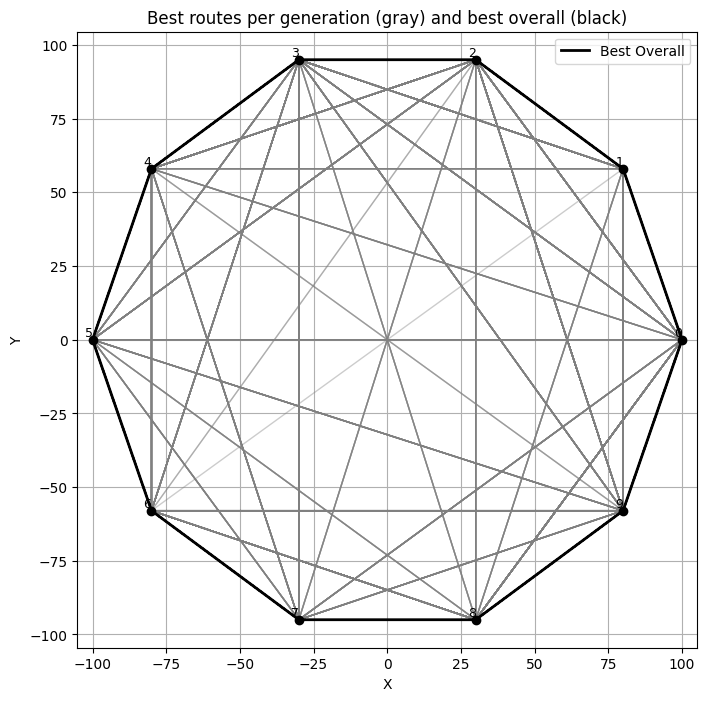

In [96]:
# Test the komiwojazer function
cities_count = 10
population_count = 200
crossover_probability = 0.7
mutaton_probability = 0.3
selection_method = 'rank'
best_chromosome, best_way, best_hist, avg_hist, worst_hist, cities, generation_best_routes = komiwojazer(cities_count, population_count, crossover_probability, mutaton_probability, selection_method, circular_city_coordinates(cities_count, 100))
print(f"Best solution found: {best_chromosome}, Distance: {best_way:.2f}")

import math

def total_distance(route: list[int], cities: list[tuple[float, float]]) -> float:
    return sum(math.dist(cities[route[i]], cities[route[(i+1) % len(route)]]) for i in range(len(route)))

cities = circular_city_coordinates(cities_count, 100)
ideal_route = list(range(cities_count))
ideal_distance = total_distance(ideal_route, cities)
print(f"Ideal circular route distance: {ideal_distance:.2f}")

draw_all_generations_routes(circular_city_coordinates(cities_count, 100), generation_best_routes, best_chromosome)

As we can see the best route in komiwojazer problem where the cities are palced on cricle is route running along this circle circuit

### Tests for different new population selection methods with different probability for methods to make offspring

first chromosome: [23, 9, 21, 28, 12, 2, 18, 8, 6, 0, 16, 4, 24, 20, 14, 13, 10, 1, 27, 5, 11, 17, 3, 29, 19, 7, 22, 26, 15, 25]
best_chromosome: [1, 18, 26, 24, 4, 20, 19, 9, 10, 0, 29, 15, 6, 27, 8, 28, 3, 16, 14, 2, 22, 17, 11, 7, 12, 21, 5, 23, 25, 13], best_way: 3786.858989890511
best_chromosome: [26, 2, 21, 18, 1, 24, 4, 20, 19, 9, 10, 0, 29, 15, 6, 27, 8, 28, 3, 16, 14, 22, 17, 11, 7, 12, 5, 23, 25, 13], best_way: 3647.085461596415
best_chromosome: [1, 28, 19, 24, 4, 20, 14, 13, 10, 0, 29, 15, 6, 27, 8, 18, 3, 16, 26, 2, 22, 17, 11, 5, 21, 23, 12, 25, 9, 7], best_way: 3560.9430475835125
best_chromosome: [1, 28, 19, 20, 4, 24, 14, 13, 10, 0, 29, 15, 6, 27, 8, 18, 3, 16, 26, 2, 22, 17, 11, 5, 21, 23, 12, 25, 9, 7], best_way: 3255.3084267414642
best_chromosome: [1, 21, 19, 24, 4, 20, 14, 13, 10, 0, 29, 15, 6, 27, 8, 18, 3, 16, 26, 2, 11, 17, 22, 5, 28, 23, 12, 25, 9, 7], best_way: 3164.348017712909
best_chromosome: [1, 29, 19, 25, 26, 20, 14, 13, 10, 4, 24, 7, 2, 27, 8, 6, 3, 16, 1

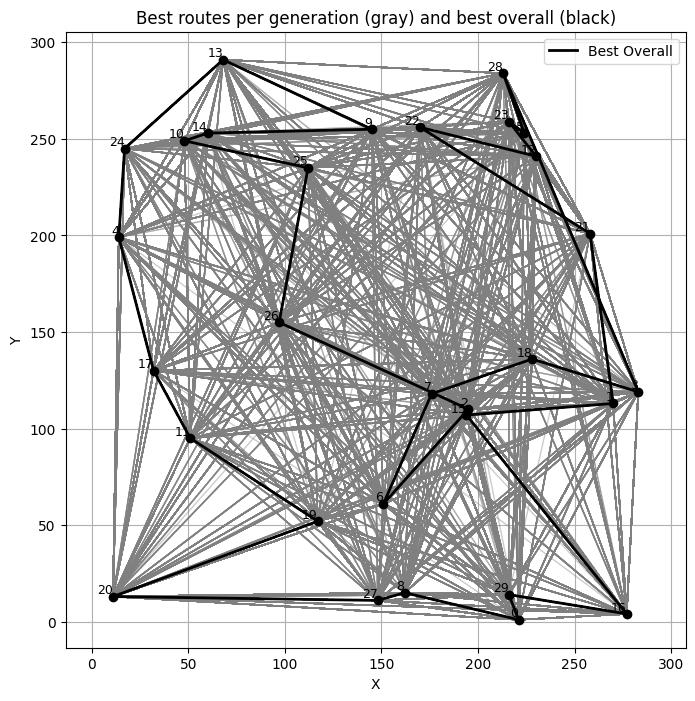

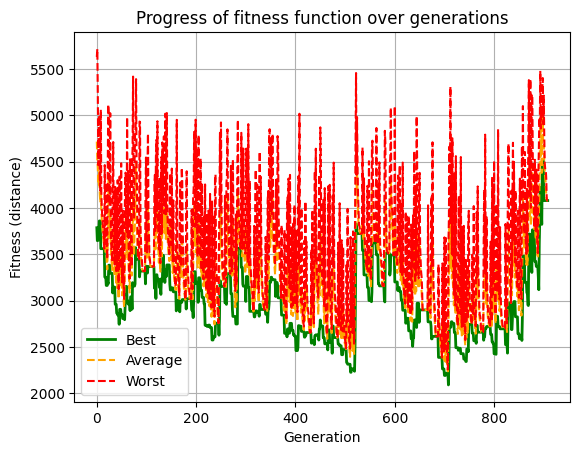

first chromosome: [23, 9, 21, 28, 12, 2, 18, 8, 6, 0, 16, 4, 24, 20, 14, 13, 10, 1, 27, 5, 11, 17, 3, 29, 19, 7, 22, 26, 15, 25]
best_chromosome: [1, 18, 26, 24, 4, 20, 19, 9, 10, 0, 29, 15, 6, 27, 8, 28, 3, 16, 14, 2, 22, 17, 11, 7, 12, 21, 5, 23, 25, 13], best_way: 3786.858989890511
best_chromosome: [26, 2, 21, 18, 1, 24, 4, 20, 19, 9, 10, 0, 29, 15, 6, 27, 8, 28, 3, 16, 14, 22, 17, 11, 7, 12, 5, 23, 25, 13], best_way: 3647.085461596415
best_chromosome: [8, 6, 26, 5, 2, 21, 18, 22, 14, 24, 17, 20, 10, 4, 23, 12, 28, 1, 16, 0, 15, 29, 9, 13, 25, 19, 27, 7, 3, 11], best_way: 3525.4188761483906
best_chromosome: [28, 22, 13, 14, 17, 2, 15, 18, 1, 10, 9, 0, 4, 24, 26, 20, 19, 29, 6, 27, 8, 3, 16, 11, 7, 12, 21, 5, 23, 25], best_way: 3309.291115793801
best_chromosome: [28, 22, 13, 14, 17, 2, 15, 18, 1, 26, 24, 4, 20, 19, 9, 10, 0, 29, 6, 27, 8, 3, 16, 11, 7, 12, 21, 5, 25, 23], best_way: 3126.9519977527116
best_chromosome: [28, 22, 13, 14, 17, 2, 15, 18, 1, 26, 24, 4, 20, 19, 9, 10, 0, 29,

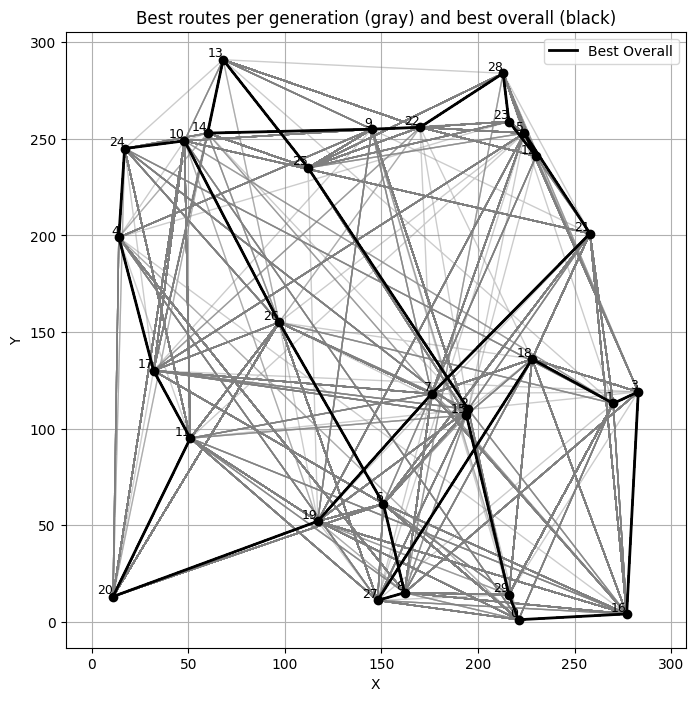

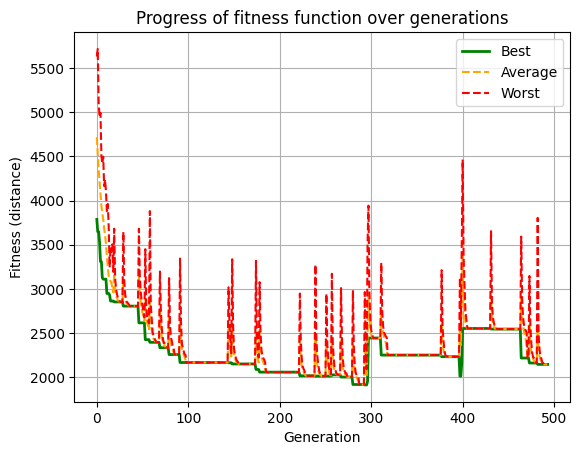

first chromosome: [23, 9, 21, 28, 12, 2, 18, 8, 6, 0, 16, 4, 24, 20, 14, 13, 10, 1, 27, 5, 11, 17, 3, 29, 19, 7, 22, 26, 15, 25]
best_chromosome: [1, 18, 26, 24, 4, 20, 19, 9, 10, 7, 14, 28, 5, 17, 25, 23, 22, 13, 6, 15, 2, 12, 11, 29, 27, 16, 0, 8, 21, 3], best_way: 3603.063885129378
best_chromosome: [6, 15, 5, 12, 3, 11, 14, 21, 28, 1, 16, 27, 0, 8, 2, 23, 22, 25, 10, 24, 4, 17, 26, 20, 7, 19, 29, 18, 9, 13], best_way: 3398.049599067909
best_chromosome: [20, 15, 5, 12, 3, 11, 14, 21, 28, 1, 16, 27, 0, 8, 2, 23, 22, 25, 10, 24, 4, 17, 26, 6, 7, 19, 29, 18, 9, 13], best_way: 3389.137221522516
best_chromosome: [0, 12, 5, 22, 4, 26, 13, 9, 28, 24, 14, 7, 19, 6, 8, 27, 23, 3, 1, 21, 2, 15, 25, 10, 18, 29, 20, 11, 17, 16], best_way: 3322.431332890587
best_chromosome: [0, 12, 5, 22, 4, 26, 10, 9, 28, 24, 14, 7, 19, 6, 8, 27, 23, 3, 1, 21, 2, 15, 25, 13, 18, 20, 11, 17, 29, 16], best_way: 3243.1754862941566
Best solution found: [0, 12, 5, 22, 4, 26, 10, 9, 28, 24, 14, 7, 19, 6, 8, 27, 23, 3,

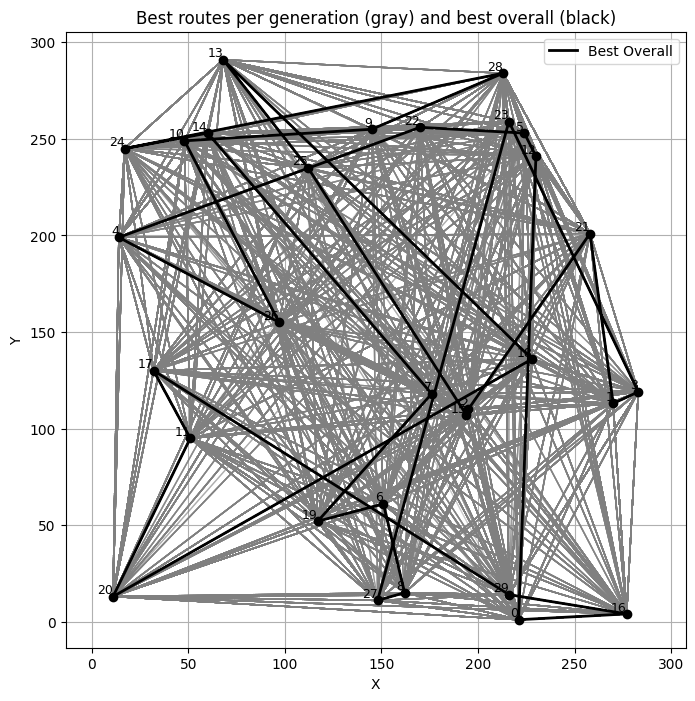

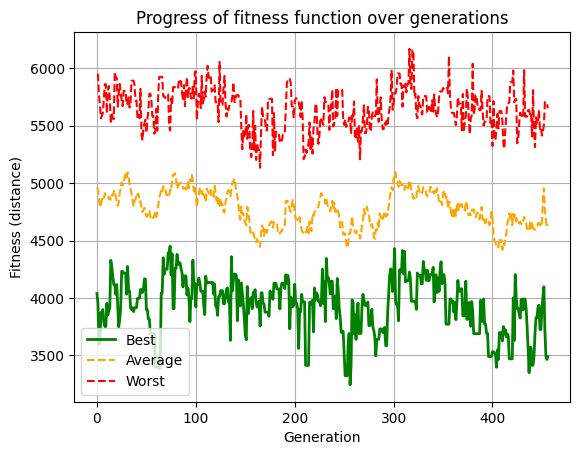

first chromosome: [23, 9, 21, 28, 12, 2, 18, 8, 6, 0, 16, 4, 24, 20, 14, 13, 10, 1, 27, 5, 11, 17, 3, 29, 19, 7, 22, 26, 15, 25]
best_chromosome: [19, 0, 29, 1, 21, 18, 3, 17, 13, 8, 27, 11, 10, 9, 25, 12, 16, 15, 2, 23, 14, 7, 26, 24, 4, 20, 6, 28, 22, 5], best_way: 3733.087174508449
best_chromosome: [1, 18, 26, 24, 4, 19, 0, 29, 21, 3, 17, 13, 8, 27, 20, 15, 5, 28, 10, 6, 11, 16, 7, 2, 22, 12, 23, 9, 14, 25], best_way: 3729.214436679423
best_chromosome: [15, 11, 19, 0, 29, 1, 21, 18, 27, 17, 20, 26, 4, 13, 22, 12, 28, 23, 9, 7, 3, 8, 16, 5, 10, 14, 2, 6, 25, 24], best_way: 3464.1272941113266
best_chromosome: [22, 18, 2, 21, 27, 20, 29, 15, 19, 17, 4, 24, 26, 13, 10, 14, 9, 12, 0, 1, 25, 23, 5, 28, 7, 8, 11, 6, 16, 3], best_way: 3419.4807578110976
best_chromosome: [5, 22, 2, 0, 27, 21, 28, 24, 20, 11, 17, 13, 10, 26, 19, 18, 1, 16, 29, 7, 6, 15, 23, 9, 25, 4, 14, 8, 3, 12], best_way: 3285.616659714643
Best solution found: [5, 22, 2, 0, 27, 21, 28, 24, 20, 11, 17, 13, 10, 26, 19, 18, 1

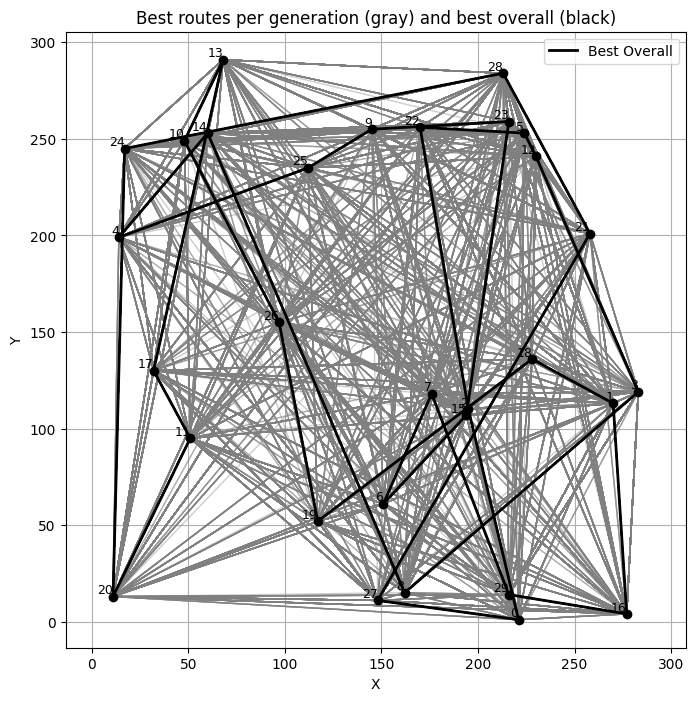

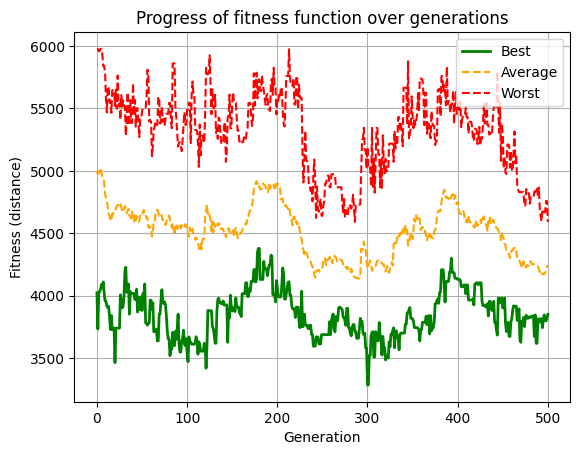

first chromosome: [23, 9, 21, 28, 12, 2, 18, 8, 6, 0, 16, 4, 24, 20, 14, 13, 10, 1, 27, 5, 11, 17, 3, 29, 19, 7, 22, 26, 15, 25]
best_chromosome: [5, 11, 9, 26, 7, 17, 10, 4, 14, 28, 24, 13, 20, 6, 1, 3, 22, 12, 19, 23, 18, 15, 25, 21, 16, 29, 8, 27, 0, 2], best_way: 3833.826806190906
best_chromosome: [19, 0, 29, 1, 21, 18, 3, 9, 13, 8, 27, 7, 11, 26, 25, 17, 4, 20, 5, 15, 6, 12, 16, 2, 10, 14, 23, 22, 28, 24], best_way: 3820.2255427211076
best_chromosome: [9, 25, 16, 5, 27, 19, 0, 29, 1, 21, 18, 3, 17, 26, 8, 20, 11, 24, 4, 6, 15, 28, 2, 14, 10, 23, 12, 22, 7, 13], best_way: 3759.682053375969
best_chromosome: [5, 27, 15, 6, 19, 17, 9, 26, 8, 20, 11, 25, 24, 4, 29, 0, 16, 23, 12, 3, 21, 18, 2, 22, 10, 14, 28, 13, 7, 1], best_way: 3534.9309591888464
best_chromosome: [16, 26, 13, 10, 4, 6, 27, 20, 19, 2, 29, 3, 1, 15, 21, 9, 22, 28, 7, 5, 25, 12, 23, 11, 0, 8, 18, 14, 24, 17], best_way: 3534.4198152828867
best_chromosome: [24, 3, 2, 12, 25, 1, 22, 14, 13, 17, 27, 0, 16, 23, 5, 28, 21, 18

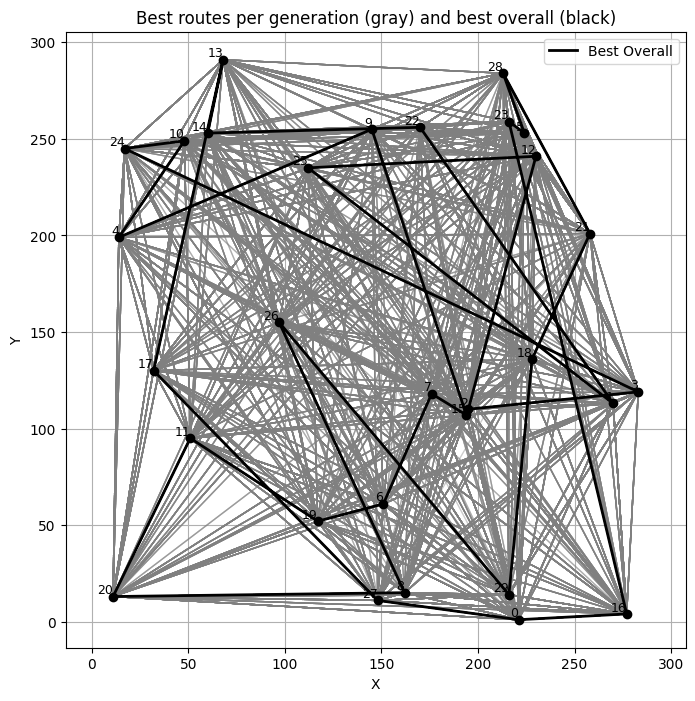

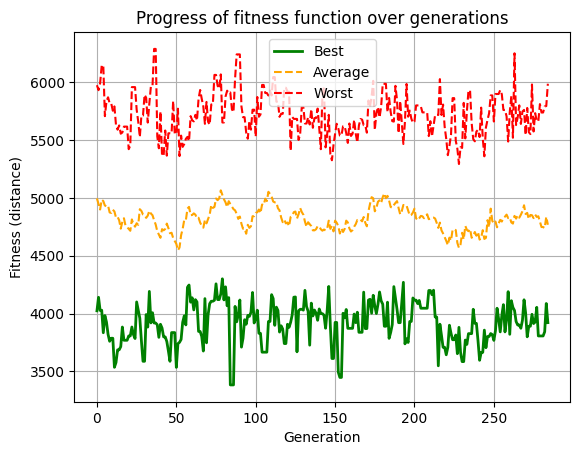

In [97]:
best_chromosome, best_way, best_hist, avg_hist, worst_hist, cities, generation_best_routes = komiwojazer(
        cities_count=30,
        population_count=200,
        crossover_probability=0.7,
        mutation_probability=0.3,
        selection_method='rank'
    )
print(f"Best solution found: {best_chromosome}, Distance: {best_way:.2f}")
draw_all_generations_routes(cities, generation_best_routes, best_chromosome)
draw_fitness_progress(best_hist, avg_hist, worst_hist)

best_chromosome, best_way, best_hist, avg_hist, worst_hist, cities, generation_best_routes = komiwojazer(
        cities_count=30,
        population_count=200,
        crossover_probability=0.95,
        mutation_probability=0.05,
        selection_method='rank'
    )
print(f"Best solution found: {best_chromosome}, Distance: {best_way:.2f}")
draw_all_generations_routes(cities, generation_best_routes, best_chromosome)
draw_fitness_progress(best_hist, avg_hist, worst_hist)

best_chromosome, best_way, best_hist, avg_hist, worst_hist, cities, generation_best_routes = komiwojazer(
        cities_count=30,
        population_count=150,
        crossover_probability=0.8,
        mutation_probability=0.2,
        selection_method='roulette'
    )
print(f"Best solution found: {best_chromosome}, Distance: {best_way:.2f}")
draw_all_generations_routes(cities, generation_best_routes, best_chromosome)
draw_fitness_progress(best_hist, avg_hist, worst_hist)

best_chromosome, best_way, best_hist, avg_hist, worst_hist, cities, generation_best_routes = komiwojazer(
        cities_count=30,
        population_count=200,
        crossover_probability=0.98,
        mutation_probability=0.02,
        selection_method='roulette'
    )
print(f"Best solution found: {best_chromosome}, Distance: {best_way:.2f}")
draw_all_generations_routes(cities, generation_best_routes, best_chromosome)
draw_fitness_progress(best_hist, avg_hist, worst_hist)

best_chromosome, best_way, best_hist, avg_hist, worst_hist, cities, generation_best_routes = komiwojazer(
        cities_count=30,
        population_count=200,
        crossover_probability=0.7,
        mutation_probability=0.3,
        selection_method='roulette'
    )
print(f"Best solution found: {best_chromosome}, Distance: {best_way:.2f}")
draw_all_generations_routes(cities, generation_best_routes, best_chromosome)
draw_fitness_progress(best_hist, avg_hist, worst_hist)

As we can see in above tests examples the selecting 'rank' method is much better than 'roullete' method in above casses.

Test for more cities


==== CITIES: 10 ====
first chromosome: [0, 4, 6, 8, 9, 7, 2, 5, 3, 1]
best_chromosome: [9, 8, 2, 0, 1, 5, 4, 6, 7, 3], best_way: 1130.0294840683785
best_chromosome: [4, 1, 0, 5, 2, 8, 7, 9, 3, 6], best_way: 1096.9895452121825
best_chromosome: [9, 3, 7, 2, 1, 5, 4, 0, 6, 8], best_way: 1020.0965897983195
best_chromosome: [9, 3, 7, 2, 5, 1, 4, 0, 6, 8], best_way: 902.6138497527808
best_chromosome: [0, 4, 6, 9, 3, 8, 7, 2, 5, 1], best_way: 897.8651040831915
best_chromosome: [0, 4, 6, 9, 8, 3, 7, 2, 5, 1], best_way: 877.8367521269803
best_chromosome: [0, 4, 6, 8, 9, 3, 7, 2, 5, 1], best_way: 843.0846018472023
Best way: 843.08
Best route: [0, 4, 6, 8, 9, 3, 7, 2, 5, 1]


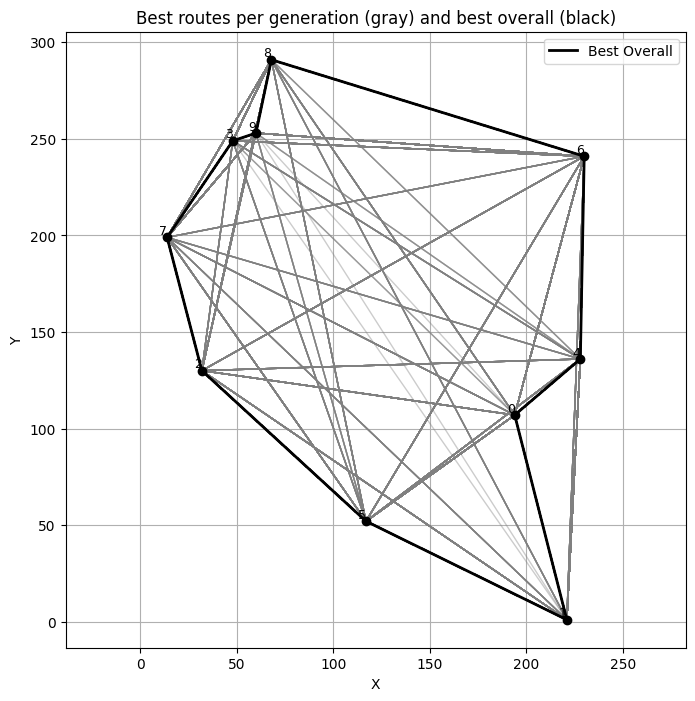

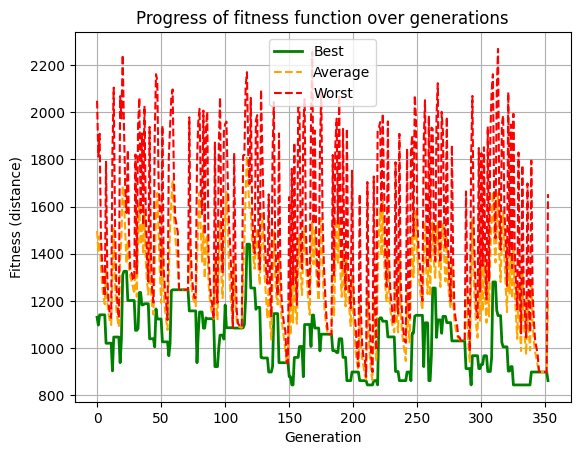


==== CITIES: 20 ====
first chromosome: [19, 7, 11, 5, 9, 10, 8, 4, 14, 0, 17, 16, 3, 18, 1, 2, 13, 12, 15, 6]
best_chromosome: [4, 11, 7, 0, 16, 17, 18, 15, 1, 2, 12, 5, 9, 6, 10, 8, 3, 19, 13, 14], best_way: 2490.7970958388787
best_chromosome: [4, 11, 7, 0, 16, 17, 19, 5, 9, 10, 8, 18, 15, 1, 2, 12, 6, 3, 13, 14], best_way: 2227.091891155508
best_chromosome: [18, 17, 16, 0, 7, 14, 10, 11, 13, 19, 6, 2, 5, 9, 15, 1, 3, 12, 4, 8], best_way: 2179.312827194679
best_chromosome: [2, 12, 0, 13, 19, 6, 10, 14, 18, 5, 1, 7, 16, 17, 4, 11, 8, 9, 15, 3], best_way: 2123.4639522454186
best_chromosome: [2, 12, 13, 0, 19, 4, 14, 8, 18, 5, 15, 7, 16, 17, 6, 11, 10, 9, 1, 3], best_way: 2094.621117012936
best_chromosome: [2, 12, 13, 0, 19, 6, 14, 8, 18, 5, 15, 7, 16, 17, 4, 11, 10, 9, 1, 3], best_way: 1888.717090471288
best_chromosome: [19, 0, 13, 17, 11, 10, 4, 8, 18, 5, 9, 14, 16, 7, 6, 2, 12, 15, 1, 3], best_way: 1739.238710515828
best_chromosome: [19, 13, 0, 17, 11, 10, 4, 8, 18, 5, 9, 14, 16, 7, 

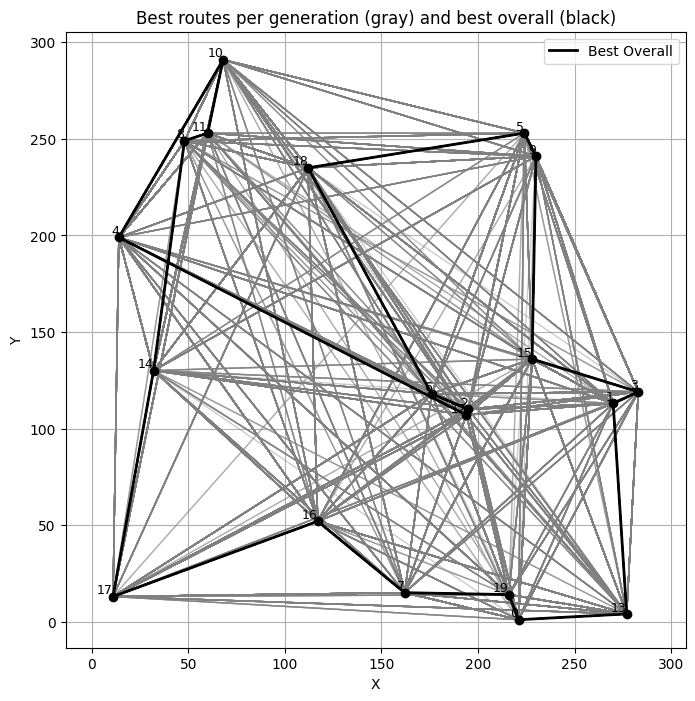

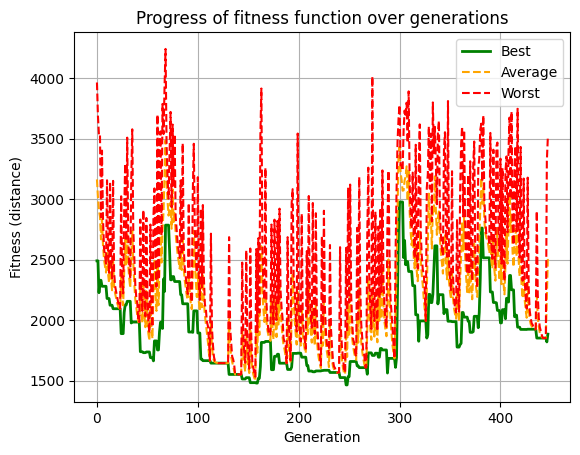


==== CITIES: 30 ====
first chromosome: [23, 9, 21, 28, 12, 2, 18, 8, 6, 0, 16, 4, 24, 20, 14, 13, 10, 1, 27, 5, 11, 17, 3, 29, 19, 7, 22, 26, 15, 25]
best_chromosome: [1, 18, 26, 24, 4, 20, 19, 9, 10, 0, 29, 15, 6, 27, 8, 28, 3, 16, 14, 2, 22, 17, 11, 7, 12, 21, 5, 23, 25, 13], best_way: 3786.858989890511
best_chromosome: [26, 2, 21, 18, 1, 24, 4, 20, 19, 9, 10, 0, 29, 15, 6, 27, 8, 28, 3, 16, 14, 22, 17, 11, 7, 12, 5, 23, 25, 13], best_way: 3647.085461596415
best_chromosome: [1, 28, 19, 24, 4, 20, 14, 13, 10, 0, 29, 15, 6, 27, 8, 18, 3, 16, 26, 2, 22, 17, 11, 5, 21, 23, 12, 25, 9, 7], best_way: 3560.9430475835125
best_chromosome: [1, 28, 19, 20, 4, 24, 14, 13, 10, 0, 29, 15, 6, 27, 8, 18, 3, 16, 26, 2, 22, 17, 11, 5, 21, 23, 12, 25, 9, 7], best_way: 3255.3084267414642
best_chromosome: [1, 21, 19, 24, 4, 20, 14, 13, 10, 0, 29, 15, 6, 27, 8, 18, 3, 16, 26, 2, 11, 17, 22, 5, 28, 23, 12, 25, 9, 7], best_way: 3164.348017712909
best_chromosome: [1, 29, 19, 25, 26, 20, 14, 13, 10, 4, 24, 7,

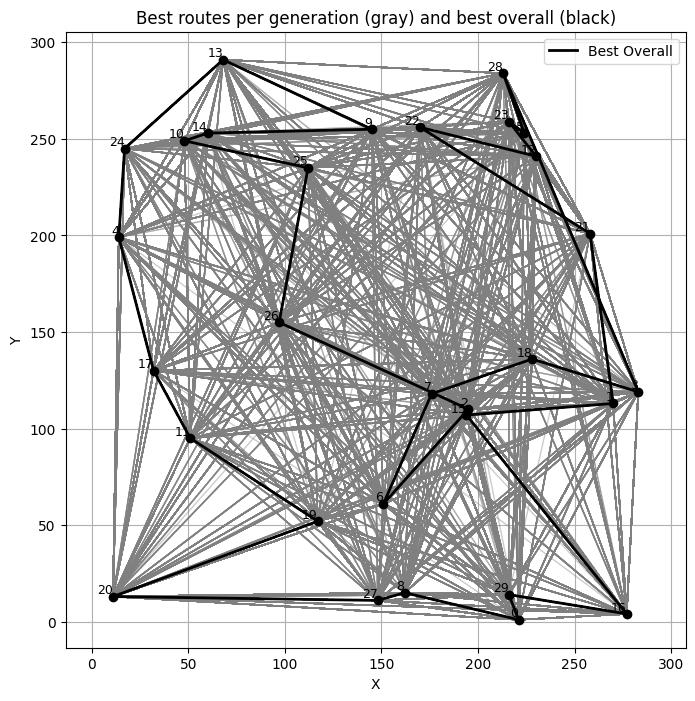

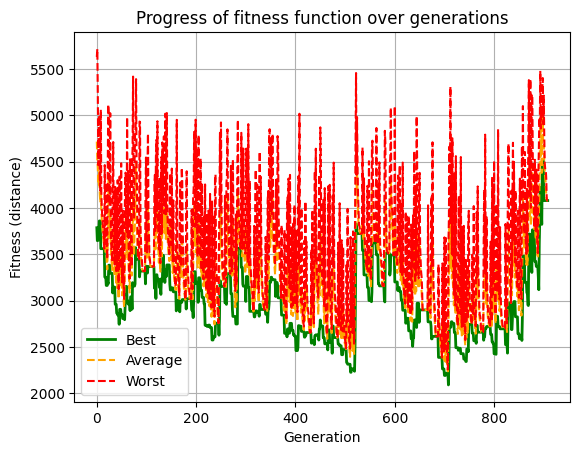


==== CITIES: 40 ====
first chromosome: [10, 3, 34, 28, 18, 17, 11, 19, 39, 14, 38, 23, 30, 22, 4, 1, 9, 0, 8, 6, 12, 35, 29, 2, 15, 16, 7, 24, 33, 20, 27, 25, 21, 5, 32, 13, 31, 36, 37, 26]
best_chromosome: [0, 3, 34, 28, 18, 17, 11, 19, 39, 14, 38, 23, 30, 22, 4, 1, 9, 10, 8, 6, 12, 35, 29, 2, 15, 16, 7, 24, 33, 20, 27, 25, 21, 5, 32, 13, 31, 36, 37, 26], best_way: 5210.481083714998
best_chromosome: [0, 3, 34, 28, 18, 17, 11, 19, 39, 14, 38, 16, 30, 22, 4, 1, 9, 10, 8, 6, 12, 35, 29, 2, 15, 23, 7, 24, 33, 20, 27, 25, 21, 5, 32, 13, 31, 36, 37, 26], best_way: 4836.531256360806
best_chromosome: [0, 39, 34, 28, 18, 17, 11, 19, 3, 14, 22, 23, 30, 16, 4, 1, 9, 10, 8, 6, 12, 35, 29, 2, 15, 38, 7, 24, 33, 20, 27, 25, 21, 5, 32, 13, 31, 36, 37, 26], best_way: 4768.16444898328
best_chromosome: [0, 39, 34, 28, 18, 11, 17, 19, 3, 14, 22, 23, 30, 16, 4, 1, 9, 10, 8, 6, 12, 35, 29, 2, 15, 38, 7, 24, 33, 20, 27, 25, 21, 5, 32, 13, 31, 36, 37, 26], best_way: 4562.985573217462
best_chromosome: [0, 3

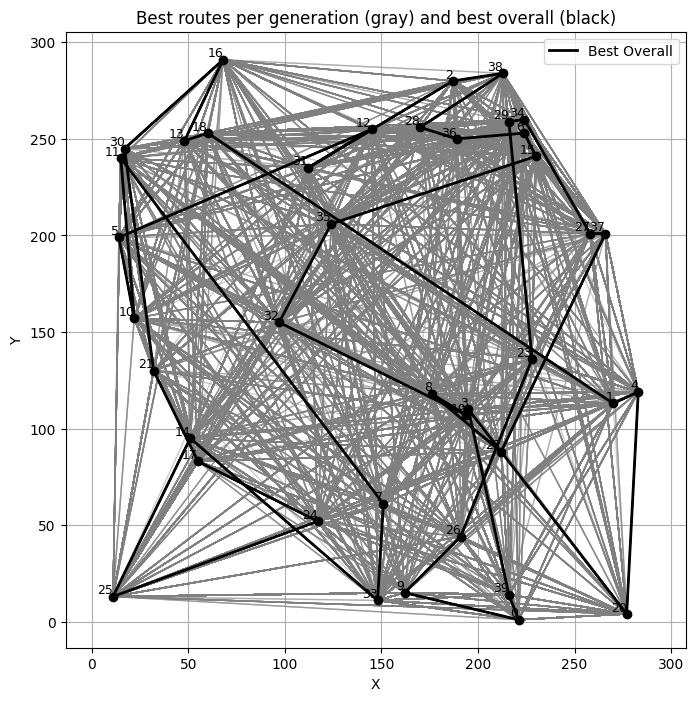

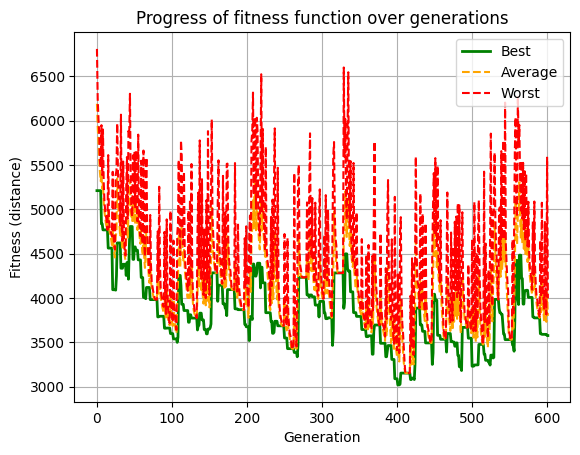


==== CITIES: 50 ====
first chromosome: [24, 2, 27, 14, 0, 10, 6, 42, 39, 3, 43, 47, 34, 30, 18, 26, 37, 12, 7, 11, 8, 31, 22, 28, 20, 9, 48, 1, 32, 36, 16, 29, 23, 46, 35, 4, 45, 21, 15, 41, 33, 13, 19, 38, 17, 49, 40, 25, 5, 44]
best_chromosome: [35, 16, 7, 41, 29, 22, 13, 38, 42, 12, 26, 32, 18, 30, 40, 10, 3, 31, 44, 33, 47, 9, 24, 46, 0, 28, 23, 49, 17, 6, 27, 36, 45, 34, 39, 20, 1, 21, 25, 37, 15, 19, 14, 5, 8, 4, 43, 11, 48, 2], best_way: 6338.4299584297505
best_chromosome: [36, 33, 26, 10, 24, 25, 22, 15, 6, 9, 12, 30, 48, 4, 2, 34, 44, 40, 16, 29, 32, 46, 27, 42, 18, 41, 13, 1, 43, 23, 8, 47, 0, 28, 20, 37, 5, 11, 14, 39, 3, 49, 35, 17, 45, 31, 21, 19, 38, 7], best_way: 6286.569996857867
best_chromosome: [35, 16, 7, 41, 29, 22, 13, 38, 42, 12, 26, 32, 18, 30, 40, 10, 3, 31, 44, 33, 47, 17, 46, 6, 27, 23, 36, 45, 34, 39, 28, 20, 9, 49, 4, 5, 25, 37, 19, 21, 14, 2, 24, 0, 8, 1, 43, 15, 48, 11], best_way: 6027.356718959675
best_chromosome: [12, 16, 7, 41, 29, 22, 13, 38, 42, 35, 

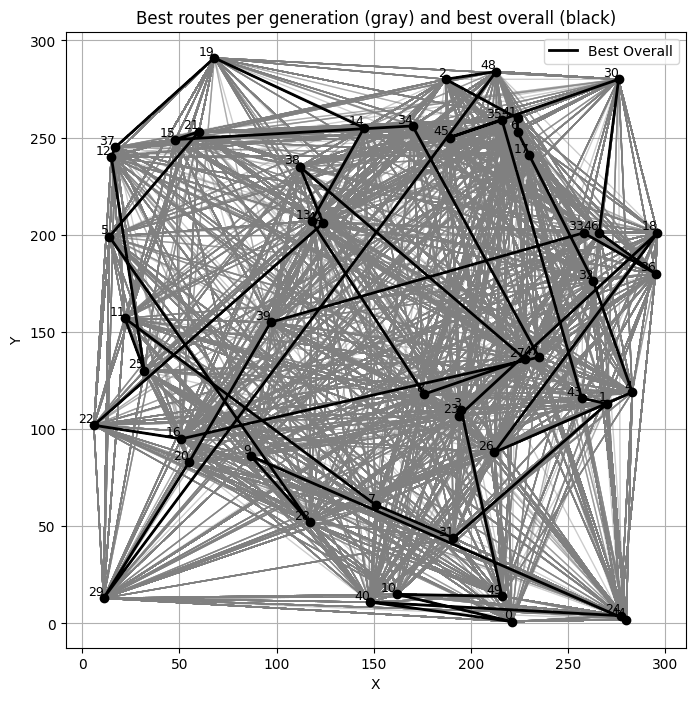

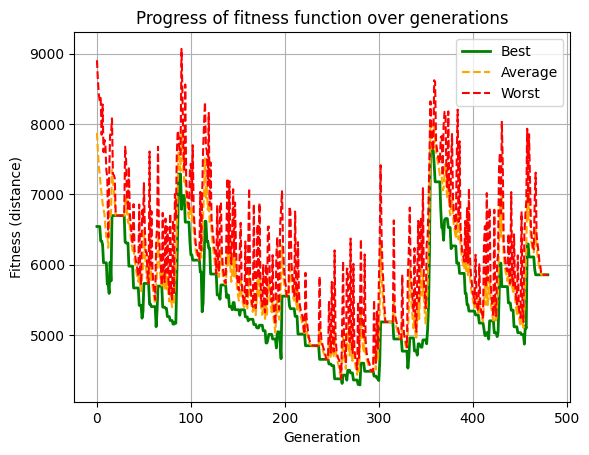

In [89]:
for num_cities in range(10, 51, 10):
    print(f"\n==== CITIES: {num_cities} ====")

    best_chromosome, best_way, best_hist, avg_hist, worst_hist, cities, generation_best_routes = komiwojazer(
        cities_count=num_cities,
        population_count=200,
        crossover_probability=0.7,
        mutation_probability=0.3,
        selection_method='rank'
    )

    print(f"Best way: {best_way:.2f}")
    print(f"Best route: {best_chromosome}")

    draw_all_generations_routes(cities, generation_best_routes, best_chromosome)
    draw_fitness_progress(best_hist, avg_hist, worst_hist)
    


==== CITIES: 10 ====
first chromosome: [5, 9, 7, 1, 8, 4, 2, 6, 3, 0]
best_chromosome: [5, 4, 6, 2, 0, 3, 9, 8, 1, 7], best_way: 1017.0432624929948
best_chromosome: [4, 6, 2, 7, 9, 8, 1, 5, 0, 3], best_way: 976.3187455069004
best_chromosome: [3, 4, 6, 2, 0, 5, 1, 8, 9, 7], best_way: 953.5218913182521
best_chromosome: [9, 8, 1, 7, 5, 0, 3, 2, 4, 6], best_way: 943.8518851318117
best_chromosome: [1, 8, 9, 4, 6, 2, 0, 3, 5, 7], best_way: 941.2189565879717
best_chromosome: [7, 1, 8, 9, 6, 4, 2, 0, 3, 5], best_way: 930.0400366830945
Best way: 930.04
Best route: [7, 1, 8, 9, 6, 4, 2, 0, 3, 5]


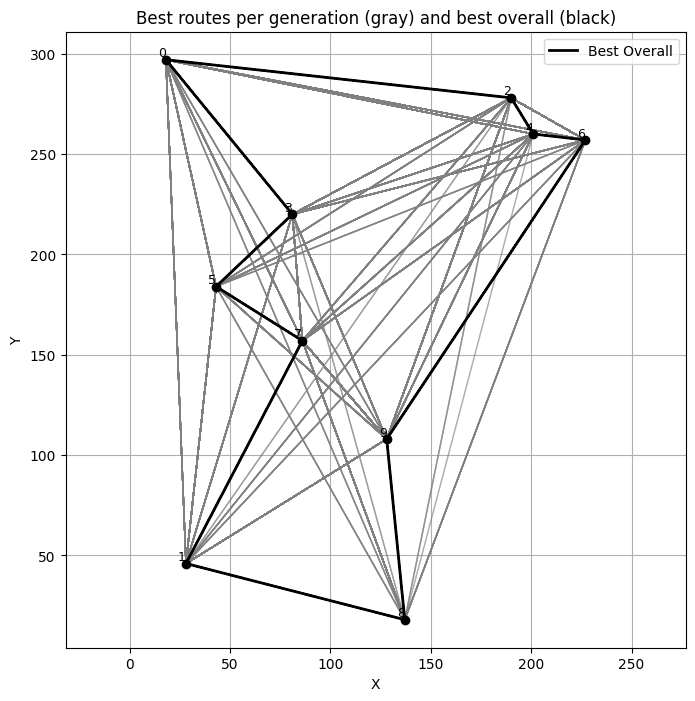

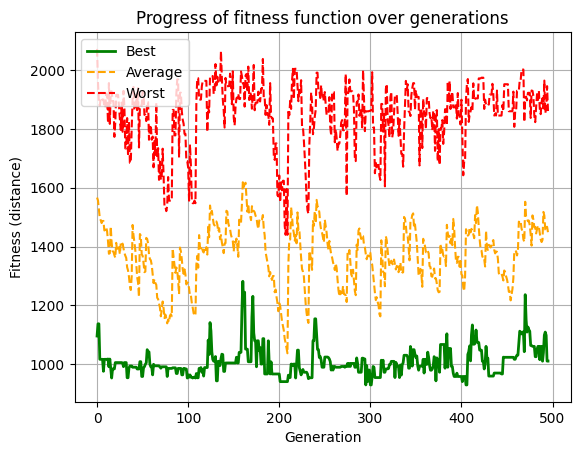


==== CITIES: 20 ====
first chromosome: [4, 14, 11, 17, 19, 16, 8, 18, 0, 13, 1, 7, 3, 9, 6, 15, 2, 10, 5, 12]
best_chromosome: [8, 2, 17, 12, 4, 18, 14, 10, 16, 1, 7, 15, 3, 13, 11, 0, 5, 19, 6, 9], best_way: 2417.263442270971
best_chromosome: [7, 15, 1, 6, 14, 5, 17, 2, 12, 10, 0, 19, 8, 13, 18, 11, 4, 3, 16, 9], best_way: 2376.356962149253
best_chromosome: [7, 15, 3, 16, 10, 0, 19, 5, 12, 14, 8, 1, 13, 4, 18, 11, 2, 17, 6, 9], best_way: 2298.636594667385
best_chromosome: [7, 15, 3, 16, 10, 0, 14, 19, 5, 12, 8, 1, 13, 4, 18, 11, 2, 17, 6, 9], best_way: 2120.7735596520442
best_chromosome: [10, 17, 9, 14, 19, 5, 7, 15, 16, 3, 1, 8, 6, 0, 2, 13, 12, 11, 4, 18], best_way: 2102.384931373855
best_chromosome: [1, 13, 10, 5, 17, 2, 0, 4, 14, 19, 7, 15, 16, 6, 9, 3, 18, 12, 11, 8], best_way: 2088.2784971982587
best_chromosome: [6, 9, 3, 16, 15, 12, 19, 2, 4, 11, 18, 1, 8, 13, 0, 17, 14, 10, 5, 7], best_way: 2022.3566225537772
best_chromosome: [6, 9, 16, 3, 15, 12, 19, 2, 4, 11, 18, 1, 8, 13, 

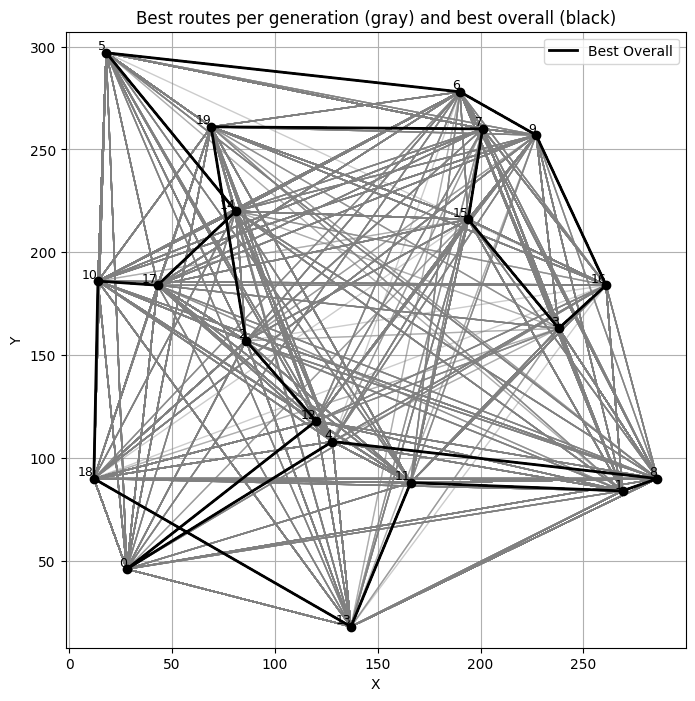

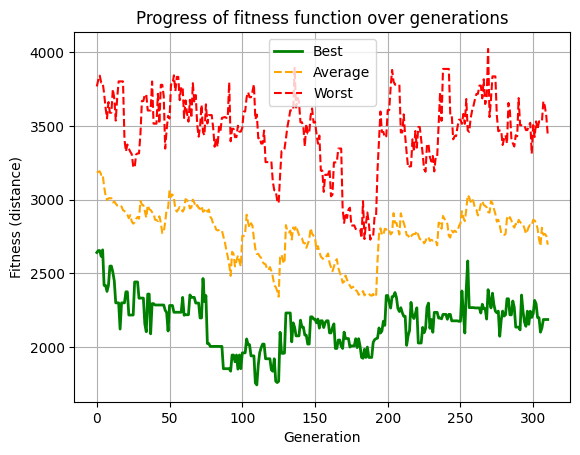


==== CITIES: 30 ====
first chromosome: [6, 3, 10, 29, 5, 11, 24, 20, 4, 14, 19, 22, 18, 23, 1, 0, 12, 25, 27, 7, 15, 28, 21, 8, 16, 9, 26, 17, 13, 2]
best_chromosome: [16, 1, 10, 19, 18, 5, 28, 6, 3, 0, 22, 7, 15, 27, 29, 9, 4, 14, 12, 2, 20, 8, 26, 17, 13, 25, 23, 21, 11, 24], best_way: 3603.665230179377
best_chromosome: [25, 19, 6, 11, 1, 24, 9, 5, 23, 22, 15, 14, 21, 29, 16, 0, 13, 10, 8, 4, 28, 2, 18, 7, 20, 3, 26, 12, 17, 27], best_way: 3403.1228557141812
best_chromosome: [23, 8, 1, 24, 16, 28, 12, 17, 26, 10, 13, 0, 4, 19, 18, 27, 5, 11, 21, 14, 9, 29, 15, 3, 6, 25, 7, 20, 2, 22], best_way: 3382.6094114184284
best_chromosome: [0, 4, 19, 12, 18, 27, 7, 2, 17, 28, 5, 23, 20, 16, 8, 15, 10, 24, 21, 14, 9, 29, 11, 1, 6, 25, 13, 22, 3, 26], best_way: 3290.9907909799003
best_chromosome: [0, 4, 19, 12, 18, 27, 7, 2, 25, 3, 16, 9, 29, 1, 17, 21, 28, 5, 23, 20, 8, 11, 10, 24, 14, 15, 22, 13, 6, 26], best_way: 3210.803272790484
best_chromosome: [0, 4, 19, 12, 18, 27, 7, 2, 25, 3, 16, 9, 2

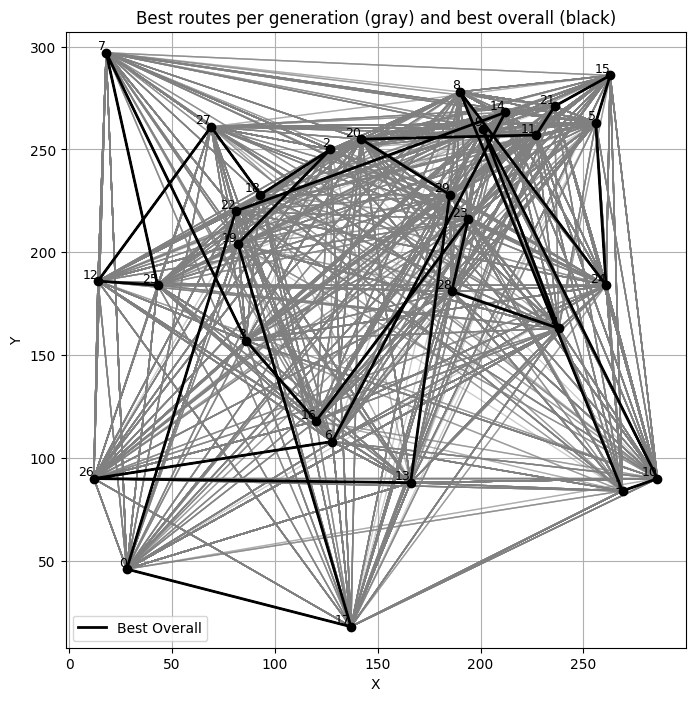

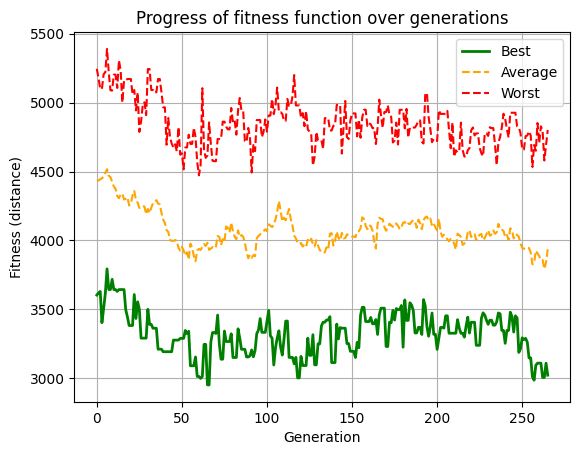


==== CITIES: 40 ====
first chromosome: [27, 22, 18, 14, 6, 33, 16, 29, 39, 13, 0, 7, 8, 24, 19, 28, 34, 11, 20, 9, 36, 21, 12, 30, 26, 17, 32, 3, 25, 5, 37, 35, 10, 15, 38, 23, 4, 2, 1, 31]
best_chromosome: [13, 21, 30, 29, 7, 12, 27, 36, 15, 8, 26, 20, 9, 28, 31, 39, 16, 2, 32, 22, 18, 6, 25, 38, 34, 0, 35, 23, 37, 1, 14, 3, 24, 17, 11, 5, 19, 4, 33, 10], best_way: 4786.38457060598
best_chromosome: [13, 21, 30, 29, 7, 12, 27, 36, 15, 8, 26, 20, 9, 28, 31, 39, 16, 2, 32, 22, 18, 6, 25, 38, 34, 0, 35, 23, 37, 1, 14, 19, 11, 10, 33, 5, 3, 24, 17, 4], best_way: 4644.863373679814
best_chromosome: [1, 0, 5, 13, 21, 30, 29, 7, 12, 27, 11, 15, 8, 26, 20, 9, 39, 2, 32, 37, 25, 17, 10, 38, 36, 14, 6, 22, 24, 34, 16, 35, 4, 33, 23, 19, 18, 28, 3, 31], best_way: 4630.7073387807595
best_chromosome: [39, 2, 0, 38, 24, 1, 21, 14, 10, 35, 17, 7, 26, 4, 25, 16, 13, 6, 19, 22, 12, 36, 11, 20, 30, 33, 3, 5, 9, 18, 27, 29, 34, 32, 37, 28, 15, 23, 8, 31], best_way: 4484.517280596038
best_chromosome: [13,

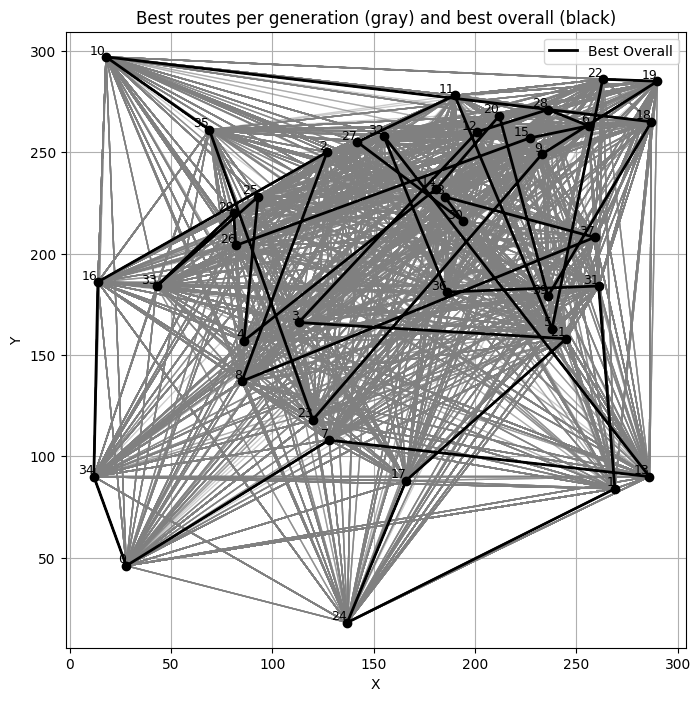

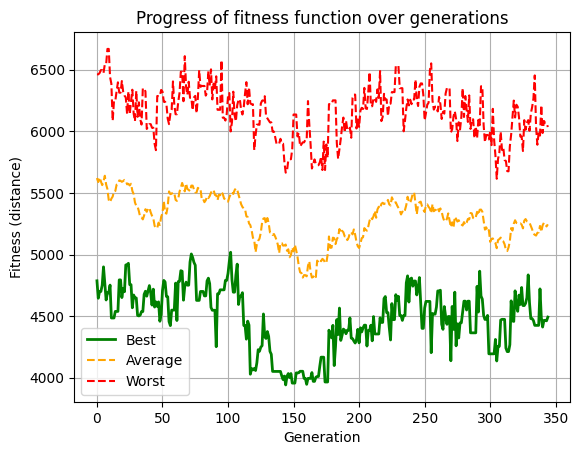


==== CITIES: 50 ====
first chromosome: [37, 9, 41, 33, 35, 7, 49, 39, 0, 1, 12, 10, 3, 36, 45, 6, 27, 16, 4, 40, 13, 28, 14, 17, 34, 48, 43, 21, 18, 8, 19, 32, 20, 25, 22, 15, 11, 47, 30, 29, 46, 42, 5, 24, 31, 26, 44, 2, 23, 38]
best_chromosome: [31, 7, 12, 16, 34, 0, 42, 9, 20, 6, 19, 13, 33, 38, 24, 23, 22, 2, 25, 5, 47, 10, 18, 39, 14, 27, 36, 17, 26, 37, 44, 11, 43, 28, 49, 40, 4, 21, 46, 45, 48, 15, 1, 3, 29, 35, 8, 41, 30, 32], best_way: 6065.254786766472
best_chromosome: [19, 13, 33, 38, 24, 23, 22, 2, 25, 42, 5, 47, 10, 18, 27, 30, 1, 39, 41, 0, 49, 4, 29, 15, 7, 45, 17, 14, 16, 48, 8, 37, 6, 32, 9, 40, 31, 35, 44, 26, 21, 20, 11, 3, 36, 12, 46, 34, 43, 28], best_way: 6053.583471306873
best_chromosome: [16, 1, 32, 8, 30, 48, 49, 40, 21, 41, 45, 9, 33, 46, 17, 19, 13, 38, 24, 23, 22, 2, 25, 42, 5, 47, 10, 18, 27, 39, 0, 4, 29, 15, 7, 14, 37, 6, 31, 35, 44, 26, 20, 11, 3, 36, 12, 34, 43, 28], best_way: 5931.610838166443
best_chromosome: [19, 13, 33, 30, 34, 37, 16, 1, 32, 8, 48

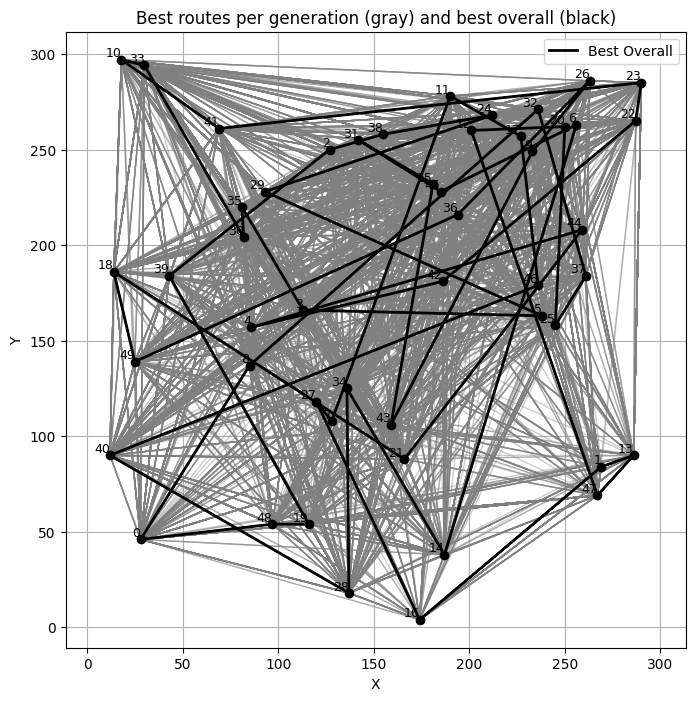

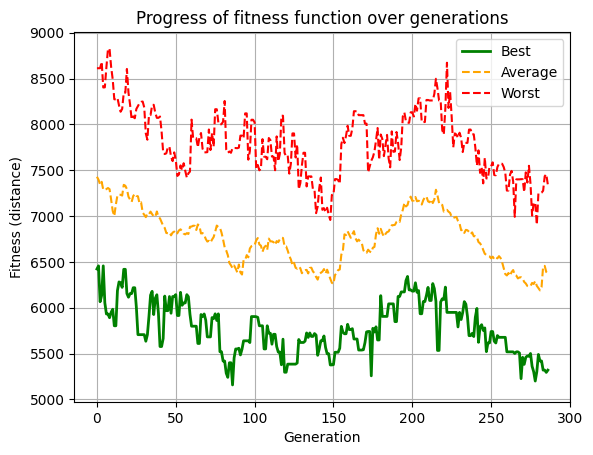

In [94]:
for num_cities in range(10, 51, 10):
    print(f"\n==== CITIES: {num_cities} ====")

    best_chromosome, best_way, best_hist, avg_hist, worst_hist, cities, generation_best_routes = komiwojazer(
        cities_count=num_cities,
        population_count=200,
        crossover_probability=0.9,
        mutation_probability=0.1,
        selection_method='roulette',
        seed=2
    )

    print(f"Best way: {best_way:.2f}")
    print(f"Best route: {best_chromosome}")

    draw_all_generations_routes(cities, generation_best_routes, best_chromosome)
    draw_fitness_progress(best_hist, avg_hist, worst_hist)
    

## Summary

The implemented genetic algorithm successfully solves the Traveling Salesman Problem (TSP), and the results confirm its correctness. As the number of cities and population size increased, the solution quality generally improved.

In the experiments, the rank selection method usually yielded better results than roulette selection, suggesting more reliable performance across generations.

However, due to the limited number of tests, it was difficult to determine the optimal balance between mutation and crossover probabilities. More extensive experimentation would be needed to fine-tune these parameters.

Finally, visualizing the best route from each generation provided valuable insights into how the algorithm evolves and improves over time.